In [6]:
#解决3sat问题中，出现了不少可视化步骤
with open('example/3sat.txt', 'r', encoding='utf8') as f:
    dimacs = f.read() 
    print(dimacs) 
    # let's check the file is as promised

 c example DIMACS-CNF 3-SAT 
p cnf 3 5 
-1 -2 -3 0 
1 -2 3 0 
1 2 -3 0 
1 -2 -3 0
-1 2 3 0


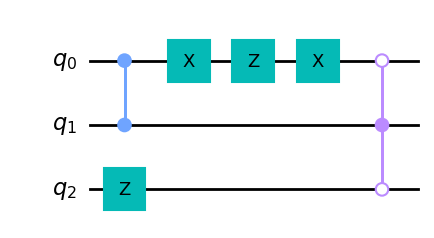

In [11]:
from qiskit.circuit.library import PhaseOracle 
oracle = PhaseOracle.from_dimacs_file('example/3sat.txt') 
oracle.draw(output='mpl')

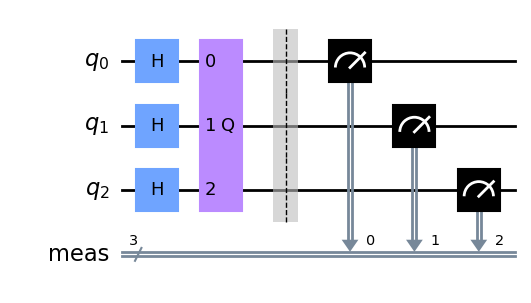

In [10]:
from qiskit import QuantumCircuit 
init = QuantumCircuit(3) 
init.h([0,1,2])
# steps 2 & 3 of Grover's algorithm
from qiskit.circuit.library import GroverOperator 
grover_operator = GroverOperator(oracle)
qc = init.compose(grover_operator)
qc.measure_all() 
qc.draw(output='mpl')

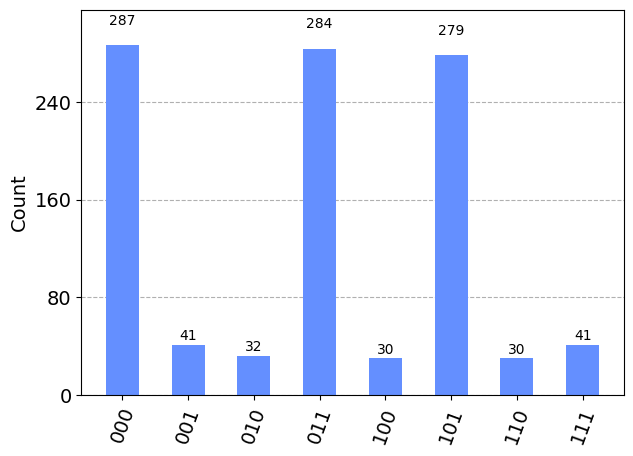

In [15]:
# Simulate the circuit 
from qiskit import Aer, transpile 
sim = Aer.get_backend('aer_simulator') 
t_qc = transpile(qc, sim)#(需要transpile一步理由：
#在使用qiskit时可以使用很多种类的量子门，这些都是抽象出来的门，
#在实际量子计算机工作中，并不会有实体门电路与之对应，
#需要将复杂门转换为简单的门，量子计算机才能读懂并开始计算)
counts = sim.run(t_qc).result().get_counts()  
# plot the results
from qiskit.visualization import plot_histogram 
plot_histogram(counts)